In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [4]:
all_congress = pd.read_csv('congress_main.csv')
all_congress.head()
all_congress['TransactionDate'] = pd.to_datetime(all_congress['TransactionDate'])
all_congress.head()

,ReportDate,TransactionDate,Ticker,Representative,Transaction,Amount,Party,House,Range,Sentiment,Price,Low_End,High_End,Adjusted_Low_End,Adjusted_High_End,Running_Portfolio_Low_End,Running_Portfolio_High_End,Est_Portfolio_Value,Shares_High_End,Shares_Low_End
0,2018-05-15,2018-03-05,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,49.059349,1001.0,15000.0,-1001.0,-15000.0,-3003.0,-45000.0,-24001.5,-305.752120,-20.403858
1,2018-06-13,2018-06-01,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,46.939678,1001.0,15000.0,-1001.0,-15000.0,-4004.0,-60000.0,-32002.0,-319.559072,-21.325242
2,2018-09-14,2018-09-06,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,50.084381,1001.0,15000.0,-1001.0,-15000.0,-5005.0,-75000.0,-40002.5,-299.494566,-19.986271
3,2019-03-06,2019-03-05,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,43.876400,1001.0,15000.0,-1001.0,-15000.0,-7007.0,-105000.0,-56003.5,-341.869433,-22.814087
4,2019-06-14,2019-06-03,VMC,A. Mitchell Jr. McConnell,Sale,250001.0,R,Senate,250001 - 500000,NaN,123.395256,250001.0,500000.0,250001.0,500000.0,241993.0,380000.0,310996.5,4052.019634,2026.017921


In [5]:
returns = pd.read_csv('returns.csv')
returns.head()
#set date as index
returns.index = returns.Date.astype('datetime64[ns]')
#drop date column
returns.drop('Date', axis=1, inplace=True)
returns

,MAR,NOV,AMJ,SUN,SEP,0QZI.IL,3V64.TI,A,AA,AAGIY,...,ZG,ZI,ZIMV,ZION,ZLNDY,ZM,ZS,ZTS,ZUO,ZURVY
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000
2018-01-02,127.941688,35.398296,18.066355,16.403414,38.057026,71.434113,0.000000,64.865364,54.232346,31.791235,...,42.299999,0.000000,0.00,42.626472,26.469,0.000000,0.000000,69.128304,0.000,21.814405
2018-01-03,130.524460,36.408302,18.510612,16.670454,38.821484,71.434113,0.000000,66.515800,53.573730,32.028351,...,42.730000,0.000000,0.00,42.576012,27.167,0.000000,0.000000,69.446152,0.000,21.764240
2018-01-04,129.807022,36.966217,18.632940,16.460234,39.014896,71.434113,0.000000,66.016830,53.770336,31.909794,...,42.009998,0.000000,0.00,42.752571,27.230,0.000000,0.000000,69.860313,0.000,21.929068
2018-01-05,128.563492,36.764214,18.459103,16.198866,38.305702,71.434113,0.000000,67.072357,53.170696,31.645321,...,42.340000,0.000000,0.00,42.769402,27.166,0.000000,0.000000,70.659790,0.000,22.115393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,225.550003,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000
2023-08-28,202.529999,20.680000,23.770000,44.830002,0.000000,295.000000,225.050003,119.919998,28.480000,34.970001,...,49.209999,17.879999,11.47,34.900002,14.630,67.570000,141.339996,186.979996,8.880,46.400002
2023-08-29,206.149994,20.930000,23.879999,45.419998,0.000000,295.500000,226.149994,122.019997,29.610001,36.080002,...,49.740002,17.840000,11.85,35.439999,15.210,68.809998,144.389999,192.770004,8.910,47.090000


In [6]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
# Function to calculate variance for a given row in all_congress
def calculate_variance(row):
    ticker = row['Ticker']
    transaction_date = row['TransactionDate']
    
    # Find the index in returns corresponding to the TransactionDate
    index = transaction_date
    
    # Calculate variance for the next 3 months (90 days)
    end_index = transaction_date + relativedelta(months=3)
    variance = np.var(returns[ticker][index:end_index])
    
    return variance

# Apply the calculate_variance function to each row in all_congress
all_congress['Variance'] = all_congress.apply(calculate_variance, axis=1)

# Now, all_congress DataFrame contains the Variance column with calculated variances
all_congress.Variance.unique()



array([  294.68418498,   349.93953765,   331.18057001, ...,
       10942.59976292,   424.25824546,   142.28037837])

In [7]:
all_congress

,ReportDate,TransactionDate,Ticker,Representative,Transaction,Amount,Party,House,Range,Sentiment,...,Low_End,High_End,Adjusted_Low_End,Adjusted_High_End,Running_Portfolio_Low_End,Running_Portfolio_High_End,Est_Portfolio_Value,Shares_High_End,Shares_Low_End,Variance
0,2018-05-15,2018-03-05,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,-3003.0,-45000.0,-24001.5,-305.752120,-20.403858,294.684185
1,2018-06-13,2018-06-01,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,-4004.0,-60000.0,-32002.0,-319.559072,-21.325242,349.939538
2,2018-09-14,2018-09-06,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,-5005.0,-75000.0,-40002.5,-299.494566,-19.986271,331.180570
3,2019-03-06,2019-03-05,WFC,A. Mitchell Jr. McConnell,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,-7007.0,-105000.0,-56003.5,-341.869433,-22.814087,248.649209
4,2019-06-14,2019-06-03,VMC,A. Mitchell Jr. McConnell,Sale,250001.0,R,Senate,250001 - 500000,NaN,...,250001.0,500000.0,250001.0,500000.0,241993.0,380000.0,310996.5,4052.019634,2026.017921,2654.537278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25417,2023-06-06,2023-05-25,SO,Zoe Lofgren,Sale,15001.0,D,Representatives,15001-50000,NaN,...,15001.0,50000.0,15001.0,50000.0,89075.0,1160000.0,624537.5,723.548195,217.078929,774.699519
25418,2023-06-06,2023-05-25,SON,Zoe Lofgren,Sale,1001.0,D,Representatives,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,90076.0,1175000.0,632538.0,252.218609,16.831389,542.281469
25419,2023-06-06,2023-05-25,SHW,Zoe Lofgren,Sale,1001.0,D,Representatives,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,91077.0,1190000.0,640538.5,66.369289,4.429044,10942.599763
25420,2023-06-06,2023-05-25,D,Zoe Lofgren,Sale,1001.0,D,Representatives,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,93079.0,1220000.0,656539.5,301.446886,20.116556,424.258245


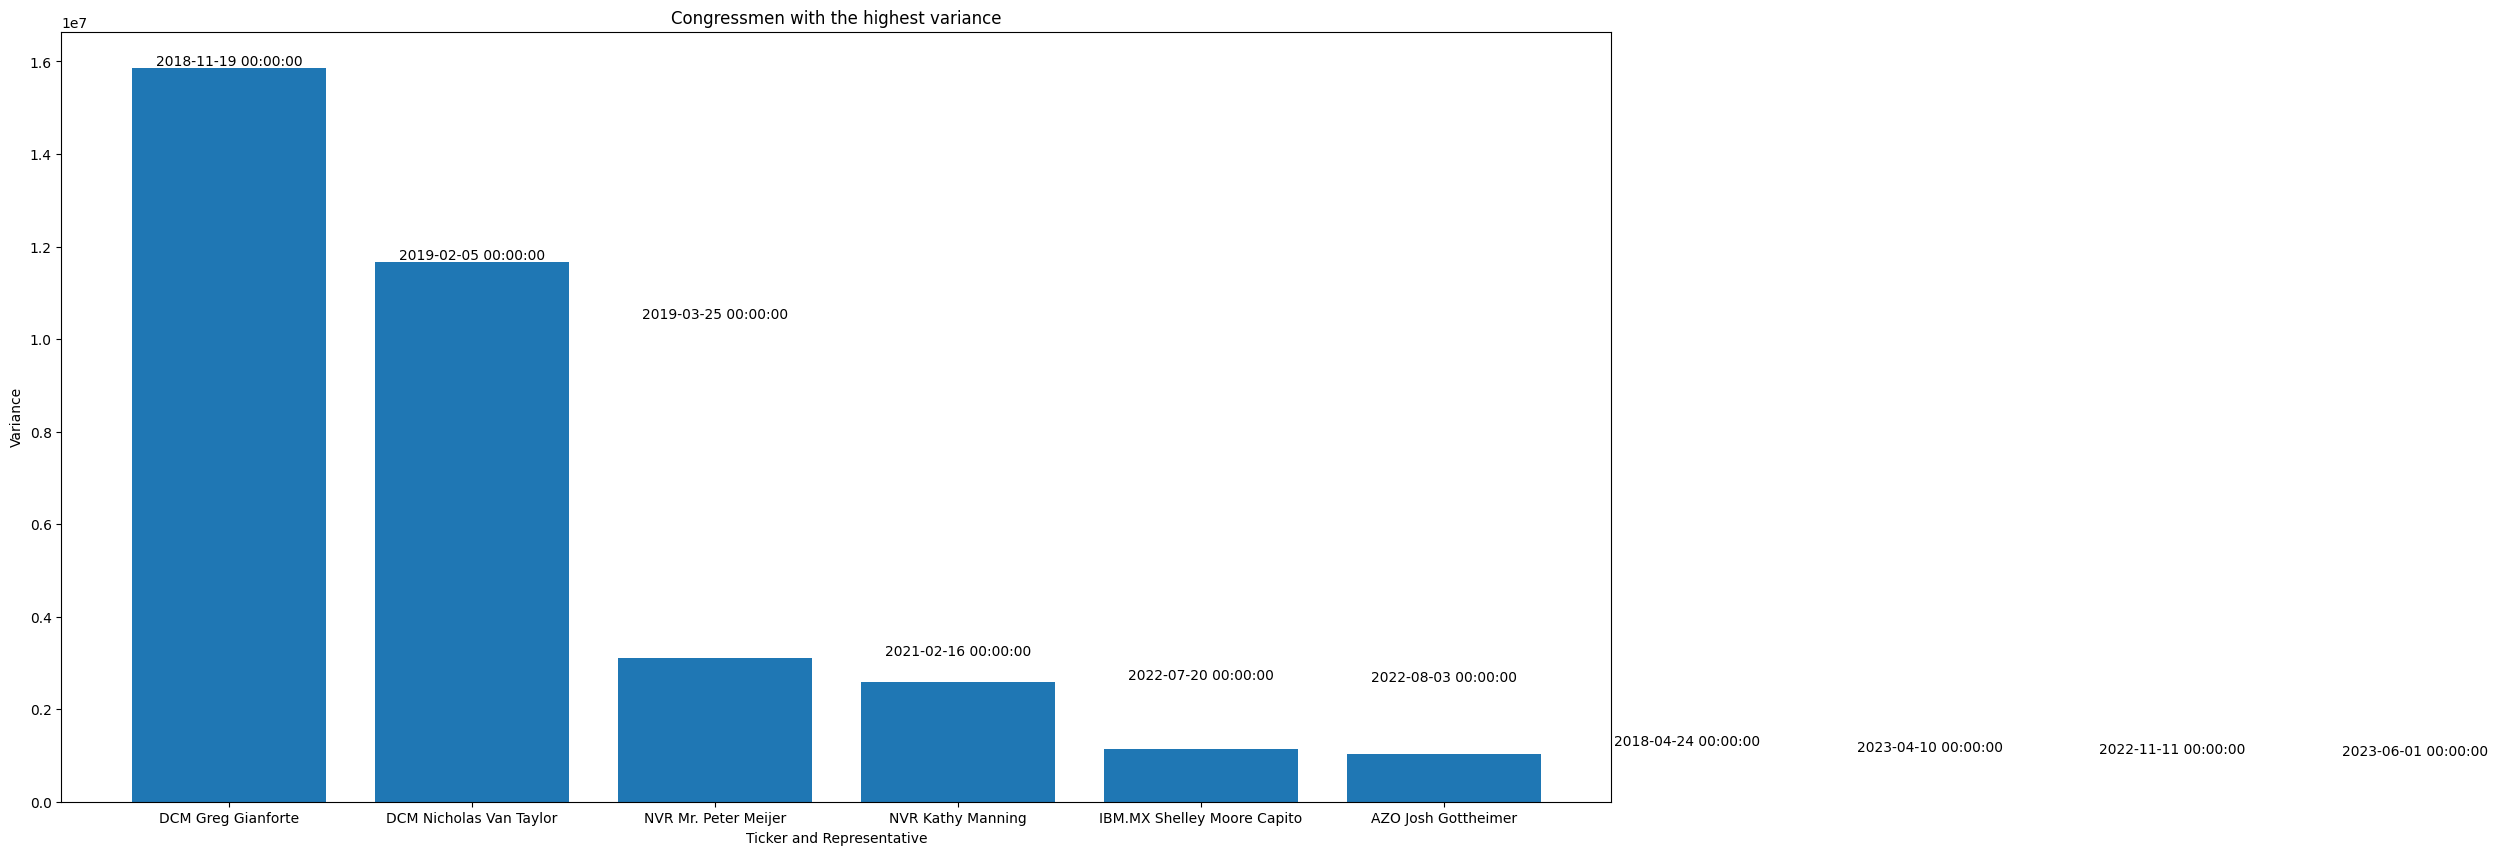

In [8]:
# show the information for the congressmen with the highest variance
highest_variance = all_congress.sort_values(by='Variance', ascending=False).head(10)

# plot
plt.figure(figsize=(20,10))
plt.bar(highest_variance['Ticker'] + ' ' + highest_variance['Representative'], highest_variance['Variance'])
plt.xlabel('Ticker and Representative')
plt.ylabel('Variance')
plt.title('Congressmen with the highest variance')

# label the bars with transaction date
for i in range(len(highest_variance)):
    plt.text(i, highest_variance['Variance'].iloc[i], highest_variance['TransactionDate'].iloc[i], rotation=0, ha='center', va='bottom')

plt.show()


Things to fix
- max change to see if it went down sig or went up sig
- min change
- take log returns 

In [9]:
all_congress.sort_values(by='Variance', ascending=False).head(29)

,ReportDate,TransactionDate,Ticker,Representative,Transaction,Amount,Party,House,Range,Sentiment,...,Low_End,High_End,Adjusted_Low_End,Adjusted_High_End,Running_Portfolio_Low_End,Running_Portfolio_High_End,Est_Portfolio_Value,Shares_High_End,Shares_Low_End,Variance
9326,2018-12-11,2018-11-19,DCM,Greg Gianforte,Sale,1001.0,R,Representatives,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,1441065.00,4540000.0,2990532.500,1.538462,0.102667,1.584978e+07
18250,2019-03-14,2019-02-05,DCM,Nicholas Van Taylor,Sale,1001.0,R,Representatives,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,4004.00,60000.0,32002.000,1.700680,0.113492,1.165563e+07
18307,2019-04-15,2019-03-25,DCM,Nicholas Van Taylor,Sale,1001.0,R,Representatives,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,137039.00,830000.0,483519.500,1.668521,0.111346,1.038645e+07
17974,2021-03-16,2021-02-16,NVR,Mr. Peter Meijer,Sale,1001.0,R,Representatives,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,589104.00,2710000.0,1649552.000,3.225806,0.215269,3.095772e+06
14337,2022-08-10,2022-07-20,NVR,Kathy Manning,Purchase,1001.0,D,Representatives,1001-15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,279937.00,-275000.0,2468.500,-3.376705,-0.225339,2.587897e+06
14517,2022-09-14,2022-08-03,NVR,Kathy Manning,Sale,1001.0,D,Representatives,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,236908.00,-745000.0,-254046.000,3.504984,0.233899,2.535483e+06
20544,2018-05-14,2018-04-24,IBM.MX,Shelley Moore Capito,Purchase,1001.0,R,Senate,1001 - 15000,NaN,...,1001.0,15000.0,-1001.0,-15000.0,38829.00,-2040000.0,-1000585.500,-5.494293,-0.366652,1.143939e+06
13361,2023-05-19,2023-04-10,AZO,Josh Gottheimer,Sale,1001.0,D,Representatives,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,26201.00,2615000.0,1320600.500,5.872129,0.391867,1.021627e+06
13155,2022-12-17,2022-11-11,AZO,Josh Gottheimer,Sale,1001.0,D,Representatives,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,-4816.00,2325000.0,1160092.000,6.226676,0.415527,9.728376e+05
13443,2023-07-11,2023-06-01,AZO,Josh Gottheimer,Sale,1001.0,D,Representatives,1001-15000,NaN,...,1001.0,15000.0,1001.0,15000.0,28217.00,2820000.0,1424108.500,6.319568,0.421726,9.374829e+05


Rank them and find each representatives average rank
- rank each sale
- certian indv have high overall rank
- take names of senators to 

## Calculating min and max

In [23]:
def calculate_max_delta(row):
    ticker = row['Ticker']
    transaction_date = pd.to_datetime(row['TransactionDate'])
    
    # Convert ticker to DatetimeIndex format
    ticker = pd.Index([ticker])
    end_index = pd.date_range(start=transaction_date, periods=90, freq='D')[-1]
    
    # Calculate max delta for the next 3 months (90 days)
    max_delta = np.max(returns.loc[transaction_date + pd.Timedelta(days=1):end_index, ticker].values - returns.loc[transaction_date, ticker].values)
    
    return max_delta

def calculate_min_delta(row):
    ticker = row['Ticker']
    transaction_date = pd.to_datetime(row['TransactionDate'])
    
    # Convert ticker to DatetimeIndex format
    ticker = pd.Index([ticker])
    end_index = pd.date_range(start=transaction_date, periods=90, freq='D')[-1]
    
    # Calculate min delta for the next 3 months (90 days)
    min_delta = np.min(returns.loc[transaction_date + pd.Timedelta(days=1):end_index, ticker].values - returns.loc[transaction_date, ticker].values)
    
    return min_delta


In [24]:
# Apply the calculate_max_delta function to each row in all_congress
all_congress['MaxDelta'] = all_congress.apply(calculate_max_delta, axis=1)

# Apply the calculate_min_delta function to each row in all_congress
all_congress['MinDelta'] = all_congress.apply(calculate_min_delta, axis=1)

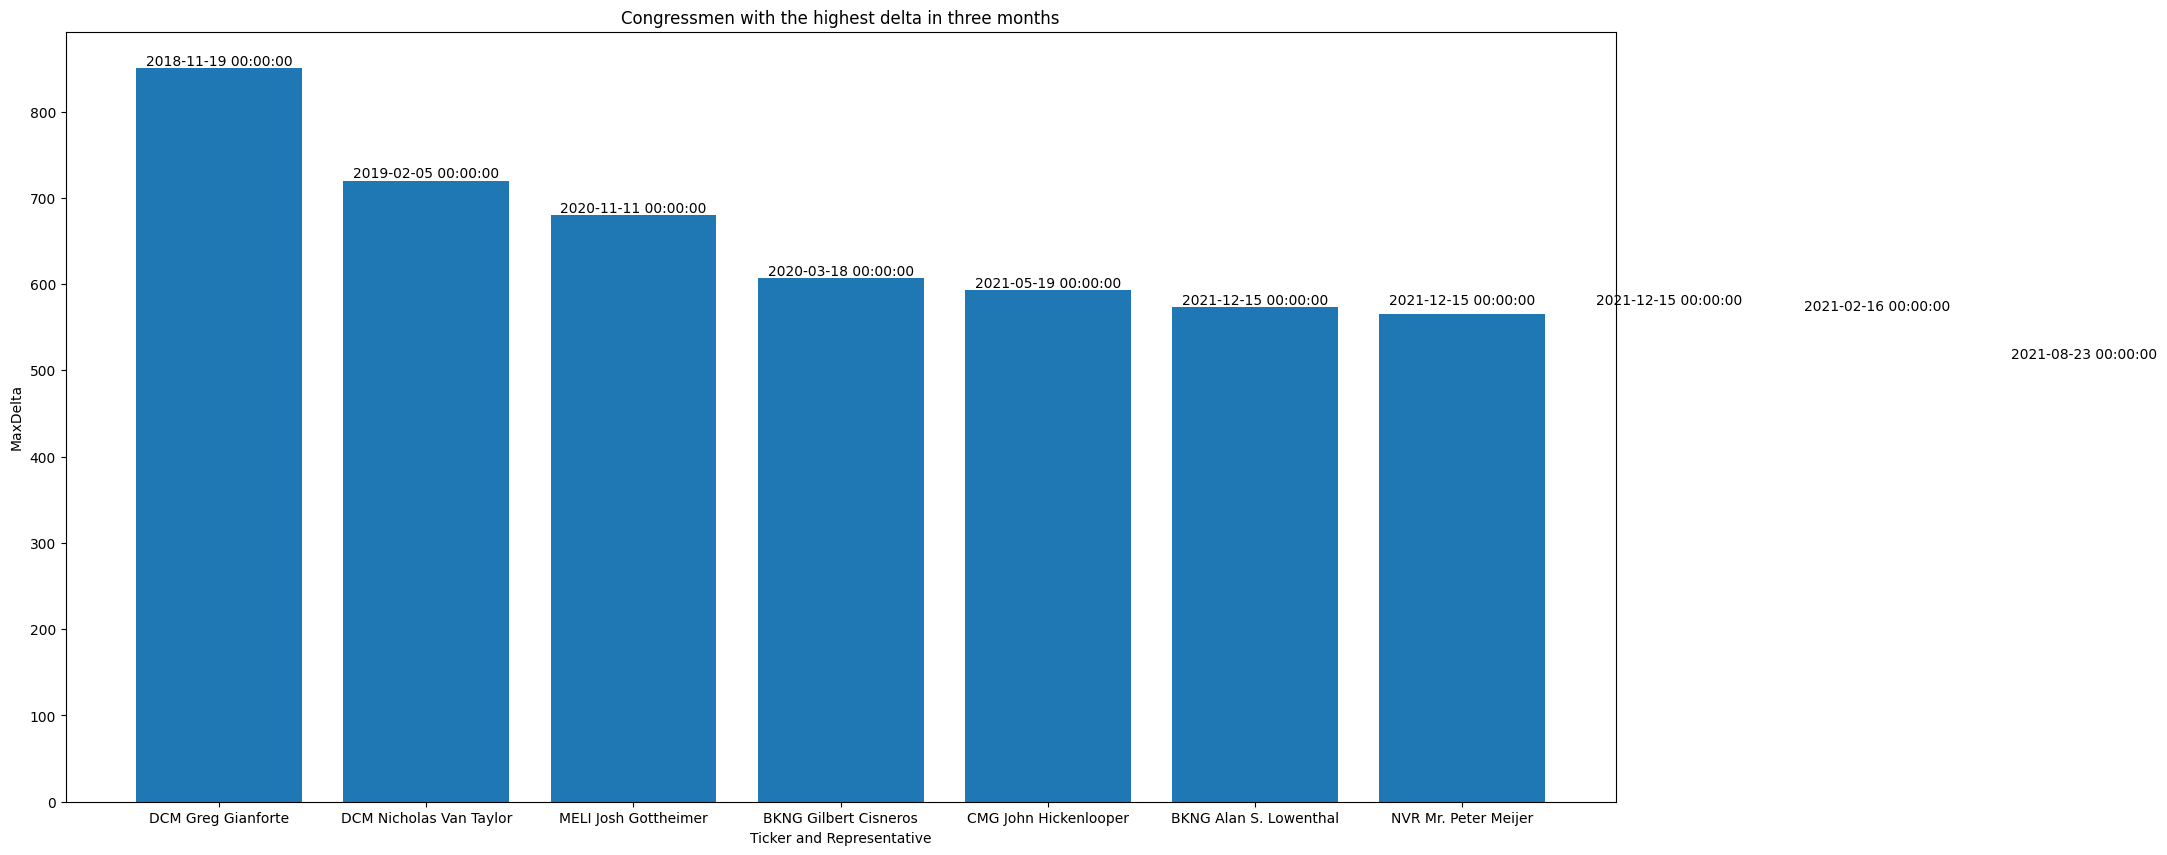

In [28]:
highest_delta = all_congress.sort_values(by='MaxDelta', ascending=False).head(10)

# plot
plt.figure(figsize=(20,10))
plt.bar(highest_delta['Ticker'] + ' ' + highest_delta['Representative'], highest_delta['MaxDelta'])
plt.xlabel('Ticker and Representative')
plt.ylabel('MaxDelta')
plt.title('Congressmen with the highest delta in three months')

# label the bars with transaction date
for i in range(len(highest_variance)):
    plt.text(i, highest_delta['MaxDelta'].iloc[i], highest_delta['TransactionDate'].iloc[i], rotation=0, ha='center', va='bottom')

plt.show()

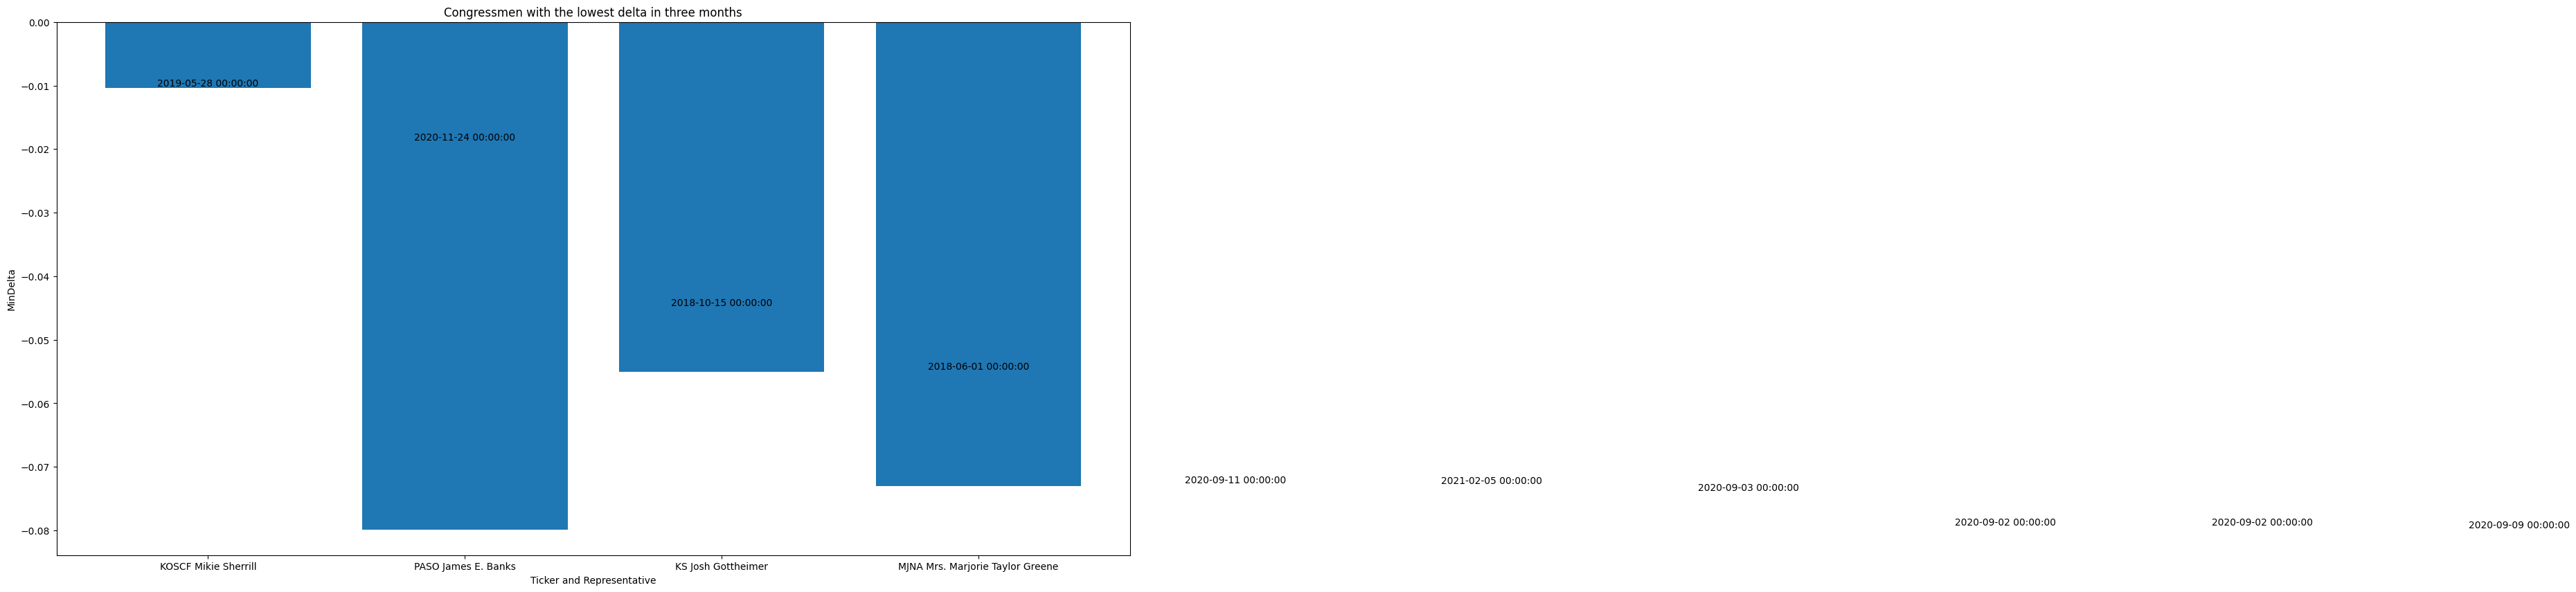

In [30]:
lowest_delta = all_congress.sort_values(by='MinDelta', ascending=False).head(10)

# plot
plt.figure(figsize=(20,10))
plt.bar(lowest_delta['Ticker'] + ' ' + lowest_delta['Representative'], lowest_delta['MinDelta'])
plt.xlabel('Ticker and Representative')
plt.ylabel('MinDelta')
plt.title('Congressmen with the lowest delta in three months')

# label the bars with transaction date
for i in range(len(lowest_delta)):
    plt.text(i, lowest_delta['MinDelta'].iloc[i], lowest_delta['TransactionDate'].iloc[i], rotation=0, ha='center', va='bottom')

plt.show()


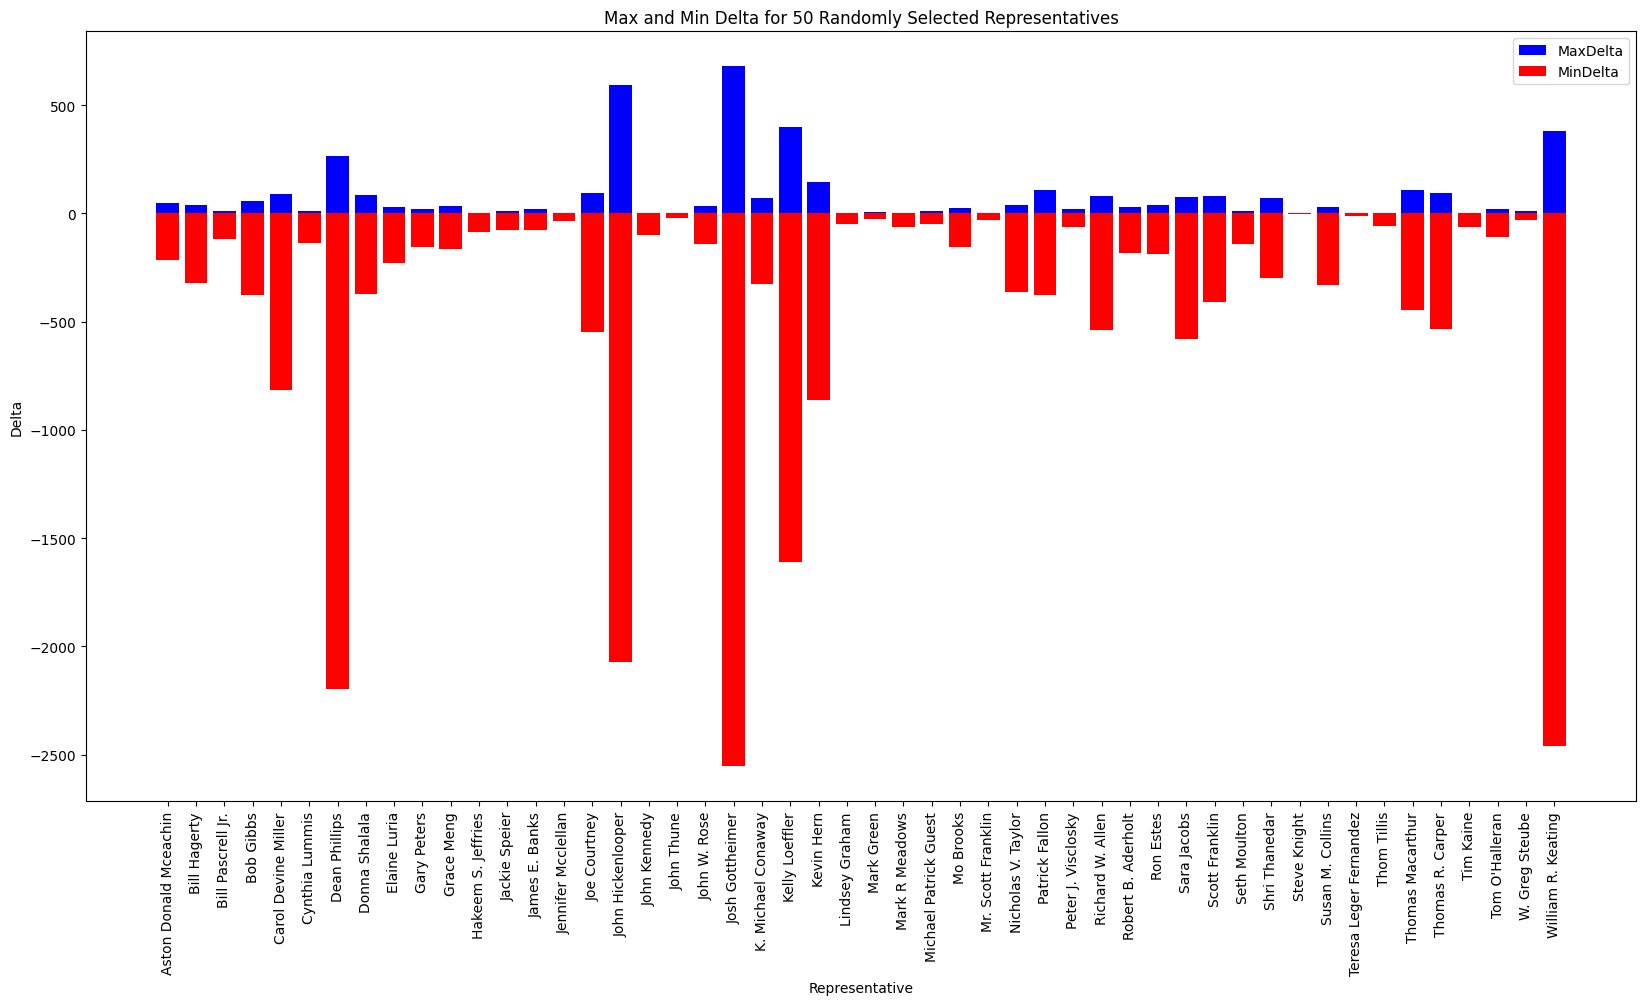

In [36]:
# randomly select 50 representatives
representatives = all_congress['Representative'].unique()
np.random.seed(42)
selected_reps = np.random.choice(representatives, size=50, replace=False)

# filter all_congress to only include selected representatives
selected_congress = all_congress[all_congress['Representative'].isin(selected_reps)]

# group by Representative and calculate max and min values
grouped = selected_congress.groupby('Representative').agg({'MaxDelta': 'max', 'MinDelta': 'min'})

# plot
plt.figure(figsize=(20,10))
plt.bar(grouped.index, grouped['MaxDelta'], color='blue', label='MaxDelta')
plt.bar(grouped.index, grouped['MinDelta'], color='red', label='MinDelta')
plt.xlabel('Representative')
plt.ylabel('Delta')
plt.title('Max and Min Delta for 50 Randomly Selected Representatives')
plt.legend()

# rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()
